Exercise for Junior Data Scientist interview with Radius, June 2017  

Veena Kumar

# Data Import

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_json('./Downloads/data_analysis.json')

In [3]:
df.head()

,address,category_code,city,headcount,name,phone,revenue,state,time_in_business,zip
0,10085 SCRIPPS RANCH CT STE A,44420000,SAN DIEGO,50 to 99,AMD CUSTOM,3123628000,$20 to 50 Million,CA,10+ years,92131
1,2566 SHALLOWFORD RD NE STE 104 # 302,31490000,ATLANTA,1 to 4,Real Hope Real Estate Inc,None,"Less Than $500,000",GA,10+ years,30345
2,212 E MAIN ST,53120000,NEOSHO,1 to 4,Jimmy Sexton Photography,4046331779,"Less Than $500,000",MO,10+ years,64850
3,6032 CHEROKEE DR,54000000,CINCINNATI,1 to 4,YOU'RE ART,4174513798,"Less Than $500,000",OH,10+ years,45243
4,1315 N WOOSTER AVE,54100000,STRASBURG,1 to 4,Hayberg Restoration Network LLC,5135612584,"$500,000 to $1 Million",OH,10+ years,44680


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
address             999986 non-null object
category_code       999986 non-null object
city                999986 non-null object
headcount           962352 non-null object
name                999986 non-null object
phone               590889 non-null object
revenue             943092 non-null object
state               999986 non-null object
time_in_business    916125 non-null object
zip                 999988 non-null object
dtypes: object(10)
memory usage: 83.9+ MB


# Fill Rates

In [5]:
#Fill rates
def fill_rates(df): 
    for i in range(len(df.columns)):
        rate = round(float(df.count()[i])/df.shape[0],5)
        print str(df.columns[i]) + ' : ' + str(rate)

In [6]:
fill_rates(df)

address : 0.99999
category_code : 0.99999
city : 0.99999
headcount : 0.96235
name : 0.99999
phone : 0.59089
revenue : 0.94309
state : 0.99999
time_in_business : 0.91612
zip : 0.99999


# Data Validity/Cleaning

To find true fill rate, we need to take a look at the actual values in the columns.

### Address

 Starting with the address column, going to filter records by address values that seem implausible (such as a short length).

In [7]:
#Doing some trial and error testing here.
print 'Length less than 7: '
print df[df.address.str.len() < 7].address.value_counts()

print 'Length less than 6: '
print df[df.address.str.len() < 6].address.value_counts()

print 'Length less than 5: '
print df[df.address.str.len() < 5].address.value_counts()

Length less than 7: 
          19
          16
none      15
null      13
0         12
1 X ST     2
6 C ST     2
1 ICON     1
2ND        1
6 Q ST     1
1 BYU      1
1 POST     1
1 PIER     1
54 HWY     1
2ND ST     1
1 A ST     1
9 F ST     1
4 P ST     1
1 Y DR     1
4 A ST     1
Name: address, dtype: int64
Length less than 6: 
         19
         16
none     15
null     13
0        12
1 BYU     1
2ND       1
Name: address, dtype: int64
Length less than 5: 
        19
        16
none    15
null    13
0       12
2ND      1
Name: address, dtype: int64


Based on the above it looks like 6 is a safe number to catch most erroneous values. Going to make those values null so they are not included in our fill rate calculations.

In [8]:
df.loc[df.address.str.len()<6, 'address'] = None

In [9]:
df[df.address.str.len()<5].address.values

array([], dtype=object)

### Category Code

Repeating the process for the rest of the columns

In [10]:
df.category_code.str.len().value_counts()

8.0    999910
1.0        29
4.0        23
0.0        11
Name: category_code, dtype: int64

Looks like there are only 11 rows with no category codes. Per the NAICS website, the code can be from 2 - 6 digits long. Any values with a length less than 2 are probably incorrect/invalid.

In [11]:
df[df.category_code.str.len() <2].category_code.value_counts()

     15
0    14
     11
Name: category_code, dtype: int64

For ease of calculations, going to update these values to None

In [12]:
df.loc[df.category_code.str.len()<2, 'category_code'] = None

In [13]:
df[df.category_code.str.len()==4].category_code

142435    none
214273    none
316453    none
339591    null
350958    null
359677    null
398925    null
432231    null
448221    null
457180    null
466522    none
477571    none
506493    null
533707    none
570456    null
588523    none
741148    null
766335    null
825757    none
856611    none
923653    null
968495    null
990961    null
Name: category_code, dtype: object

In [14]:
#Updating values of length 4 as well
df.loc[df.category_code.str.len()==4, 'category_code'] = None

In [15]:
#Double checking that it worked
df.category_code.str.len().value_counts()

8.0    999910
Name: category_code, dtype: int64

Cool, onto the next!

### City

In [16]:
df.city.str.len().value_counts()

7.0     156680
8.0     137889
9.0     130751
10.0    128597
6.0     121942
11.0     92861
12.0     59314
5.0      50799
13.0     41943
14.0     21107
4.0      17931
15.0     14508
16.0     14456
17.0      4985
18.0      2532
19.0      1362
3.0        838
20.0       796
22.0       285
21.0       193
25.0       118
23.0        35
1.0         24
0.0         19
24.0         3
26.0         1
Name: city, dtype: int64

Checking values for length of 0 and 1

In [17]:
df[df.city.str.len() <2].city.values

array([u'', u' ', u' ', u'0', u'', u'', u' ', u' ', u'0', u'', u'0', u' ',
       u'', u'', u'', u' ', u'', u'', u'0', u' ', u' ', u'0', u'', u' ',
       u'', u'0', u'0', u'0', u'0', u'0', u'', u'0', u' ', u'', u'0', u'',
       u'', u'', u'', u'0', u' ', u'', u''], dtype=object)

Only a few values overall, but might as well clean them up!

In [18]:
df.loc[df.city.str.len()<2, 'city'] = None

### Headcount

In [19]:
df.headcount.value_counts()

1 to 4        358207
5 to 9        212401
10 to 19      151412
20 to 49      121264
50 to 99       60526
100 to 249     36475
250 to 499     11138
Over 1,000      5600
500 to 999      5250
none              17
                  17
0                 15
null              12
0                 10
                   8
Name: headcount, dtype: int64

In [20]:
df.loc[df.headcount.str.len() <5,'headcount'] =  None

### Name

In [21]:
df[df.name.str.len() <2].name.values

array([u' ', u'0', u' ', u'A', u'Q', u'0', u'0', u' ', u'0', u' ', u' ',
       u'', u'0', u' ', u'0', u' ', u'', u'', u' ', u'', u'', u'0', u' ',
       u'0', u'0', u'', u'', u' ', u' ', u' ', u'0', u'0', u'', u' ', u' ',
       u'0', u'', u'0', u'0', u'', u' ', u'0', u'', u'0'], dtype=object)

In [22]:
df.loc[df.name.str.len() <2,'name'] = None

### Phone

In [23]:
df.phone.str.len().value_counts()

10.0    581380
14.0      9412
4.0         33
1.0         28
0.0         12
15.0         2
13.0         2
16.0         1
12.0         1
Name: phone, dtype: int64

In [24]:
df[df.phone.str.len() < 5].phone.value_counts()

none    22
0       18
        12
null    11
        10
Name: phone, dtype: int64

Updating the above values to 'None', as they already offer no real value

In [25]:
df.loc[df.phone.str.len()<5,'phone'] = None

Let's take a look at some of the values from different string lengths to see what we're working with.

In [26]:
df[df.phone.str.len()==10].phone.iloc[:10]

0     3123628000
2     4046331779
3     4174513798
4     5135612584
6     4082621271
9     2078825494
10    5616897900
11    2166910471
12    5033361658
16    7168339295
Name: phone, dtype: object

In [27]:
df[df.phone.str.len()>10].phone.iloc[:10]

215     (859) 626-1324
376     (814) 208-8252
381     (213) 253-3701
647     (972) 745-9634
674     (708) 482-7328
753     (408) 414-8765
821     (646) 307-5799
836     (949) 222-1316
1183    (240) 200-5852
1271    (626) 568-6030
Name: phone, dtype: object

Looks like there are many different formats for the numbers. Importing a package that can help with phonenumbers.

In [28]:
import phonenumbers

In [29]:
def clean_phone(value):
    if value:
        phone = phonenumbers.parse(value,None,_check_region=False) #parses out the numbers
        phone_final = phonenumbers.format_number(phone,phonenumbers.PhoneNumberFormat.NATIONAL)#formats the numbers
        return phone_final

In [30]:
df.phone = df.phone.map(lambda x: clean_phone(x))

In [31]:
#Checking the string length count again to make sure it worked!
df.phone.str.len().value_counts()

10.0    590798
Name: phone, dtype: int64

### Revenue

In [32]:
df.revenue.value_counts()

Less Than $500,000        329635
$1 to 2.5 Million         169540
$500,000 to $1 Million    153163
$2.5 to 5 Million          99245
$5 to 10 Million           83924
$10 to 20 Million          48454
$20 to 50 Million          32797
$50 to 100 Million         12765
$100 to 500 Million        10130
Over $1 Billion             1769
Over $500 Million           1579
null                          19
                              16
none                          15
0                             15
0                             15
                              11
Name: revenue, dtype: int64

In [33]:
df.loc[df.revenue.str.len()<5,'revenue'] = None

### State

In [34]:
df.state.value_counts()

CA      122812
TX       70301
FL       63245
NY       57411
IL       44126
PA       40609
OH       36524
MI       31237
NC       30389
MA       30014
GA       29797
NJ       28837
VA       27161
WA       24295
MN       22243
CO       21781
MD       19973
IN       19861
MO       19558
WI       18754
TN       18445
AZ       18152
OR       15690
CT       15107
SC       12842
LA       12229
AL       12172
KY       11393
IA       10880
KS       10523
OK       10456
UT        8873
AR        7377
NE        7080
NV        6700
NH        6139
MS        5864
ME        5793
ID        5135
NM        5076
DC        4499
RI        3880
MT        3817
HI        3754
SD        3306
WV        3217
VT        3029
DE        2849
AK        2515
ND        2315
WY        1858
0           21
null        20
            15
            14
0           11
none         9
PR           2
VI           1
Name: state, dtype: int64

In [35]:
df.loc[df.state == ' ','state'] = None

In [36]:
df.loc[df.state == 'none','state'] = None
df.loc[df.state == '0','state'] = None
df.loc[df.state == 0,'state'] = None

In [37]:
df.state.value_counts()

CA      122812
TX       70301
FL       63245
NY       57411
IL       44126
PA       40609
OH       36524
MI       31237
NC       30389
MA       30014
GA       29797
NJ       28837
VA       27161
WA       24295
MN       22243
CO       21781
MD       19973
IN       19861
MO       19558
WI       18754
TN       18445
AZ       18152
OR       15690
CT       15107
SC       12842
LA       12229
AL       12172
KY       11393
IA       10880
KS       10523
OK       10456
UT        8873
AR        7377
NE        7080
NV        6700
NH        6139
MS        5864
ME        5793
ID        5135
NM        5076
DC        4499
RI        3880
MT        3817
HI        3754
SD        3306
WV        3217
VT        3029
DE        2849
AK        2515
ND        2315
WY        1858
null        20
            14
PR           2
VI           1
Name: state, dtype: int64

### Time in Business

In [38]:
df.time_in_business.value_counts()

10+ years           758867
6-10 years          106144
3-5 years            38280
1-2 years            12756
null                    17
0                       15
none                    14
                        13
                        11
0                        7
Less than a year         1
Name: time_in_business, dtype: int64

In [39]:
df.loc[df.time_in_business == 'none','time_in_business'] = None
df.loc[df.time_in_business == '0','time_in_business'] = None
df.loc[df.time_in_business == 0,'time_in_business'] = None
df.loc[df.time_in_business == ' ','time_in_business'] = None
df.loc[df.time_in_business == 'null','time_in_business'] = None

In [40]:
df.time_in_business.value_counts()

10+ years           758867
6-10 years          106144
3-5 years            38280
1-2 years            12756
                        11
Less than a year         1
Name: time_in_business, dtype: int64

### Zip

In [41]:
df.zip.str.len().value_counts()

5.0    953374
4.0     46553
1.0        28
0.0        19
Name: zip, dtype: int64

According to this article (https://www.zip-codes.com/learn-about/why-are-there-3-and-4-digit-zip-codes-in-the-united-states.asp) zip codes are *always* 5-digits, and ones that are shorter are actually preceded by zeros. Need to do more research to determine if zeros can end a zip code as well, which would cause an issue as there are ~47,000 4-digit codes so a zero could be either leading or ending it.

In [42]:
df.loc[df.zip.str.len() <2,'zip'] = None

In [43]:
df.zip.str.len().value_counts()

5.0    953374
4.0     46553
Name: zip, dtype: int64

### Saving file

In [44]:
df.to_csv('./Downloads/cleaned_df.csv',encoding="utf-8")

# True Fill Rates

In [45]:
fill_rates(df)

address : 0.99991
category_code : 0.99992
city : 0.99994
headcount : 0.96228
name : 0.99994
phone : 0.5908
revenue : 0.94302
state : 0.99993
time_in_business : 0.91606
zip : 0.99994


# Cardinality

In [46]:
def cardinality(df):
    for c in df.columns:
        print str(c) + ': \n',len(set(df[c]))

In [47]:
cardinality(df[['category_code','city','headcount','revenue','time_in_business']])

category_code: 
1180
city: 
13718
headcount: 
11
revenue: 
13
time_in_business: 
7


# Other

In [48]:
df[df.isnull().any(axis=1)].shape

(509373, 10)

The above line of code tells us that there are ~509,000 records that have at least one value that is missing. Most of which are probably due to a missing phone field.

It would be interesting to see the most common category codes

In [49]:
codes = df.groupby(['category_code']).count()
codes = codes.reset_index()

In [50]:
codes['Count'] = codes['address']

In [51]:
codes = codes[['category_code','Count']]

In [52]:
#Sorting the columns by Count to see the top NAICS codes
codes.sort(columns='Count',ascending=False).iloc[:10]

/Users/veenakumar/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,category_code,Count
922,61111000,39458
800,54111000,37888
783,53120000,32576
797,54000000,31739
392,42000000,30167
945,62110000,29203
798,54100000,28690
66,23000000,27535
769,52420000,26887
988,62400000,22003


Looking them up on the NAICS website to see what they are!  

**61111** : Schools/Education  
**54111** : Law Offices/Services  
**5312** : Real Estate Services  
**54** : Professional, Scientific, and Technical Services  
**42** : Wholesalers  
**6211** : Physician's Offices  
**541** : Professional, Scientific, and Technical Services  
**23** : Construction Services  
**5242** : Agencies, Brokerages, and Insurance Related Activities  
**624** : Social Assistance  


Okay, so let's put this into a business context. Let's say a client's company provides HR services. Let's make the assumption that companies that have been around for fewer number of years are less likely to have a robust HR department, and thus potential clients. To further narrow down our target audience, let's also assume that smaller companies are more likely to use a third-party HR service for their needs, due to lack of resources to handle those services. Okay, let's look at the snapshot.

In [53]:
#Narrowing down by 'Time in Business' and then by 'Headcount'
df.groupby(['time_in_business','headcount']).count()

address  category_code    city    name   phone  \
time_in_business headcount                                                    
                 1 to 4            3              3       3       3       2   
                 10 to 19          1              1       1       1       1   
                 100 to 249        2              2       2       2       0   
                 20 to 49          1              1       1       1       1   
                 5 to 9            3              3       3       3       2   
1-2 years        1 to 4         4494           4494    4494    4494    2635   
                 10 to 19       1946           1946    1945    1945    1130   
                 100 to 249      476            476     476     476     283   
                 20 to 49       1567           1568    1568    1568     930   
                 250 to 499      146            146     146     146      95   
                 5 to 9         2730           2730    2730    2730    1631   
                 50 to 99        757            757     757     757     447   
                 500 to 999       68             68      68      68      43   
                 Over 1,000       84             84      84      84      49   
10+ years        0                 6              6       6       6       4   
                 1 to 4       271641         271633  271649  271651  160771   
                 10 to 19     114927         114934  114933  114932   67691   
                 100 to 249    27716          27714   27715   27713   16219   
                 20 to 49      92083          92081   92084   92086   54307   
                 250 to 499     8555           8555    8556    8555    5117   
                 5 to 9       160990         160996  160996  161000   95241   
                 50 to 99      46104          46105   46103   46103   27275   
                 500 to 999     4015           4015    4015    4015    2388   
                 Over 1,000     4179           4180    4180    4179    2455   
3-5 years        0                 1              1       1       1       1   
                 1 to 4        13890          13890   13890   13890    8165   
                 10 to 19       5761           5762    5761    5762    3406   
                 100 to 249     1342           1342    1342    1342     758   
                 20 to 49       4581           4581    4582    4581    2709   
                 250 to 499      392            392     392     392     242   
                 5 to 9         8180           8180    8179    8180    4840   
                 50 to 99       2249           2249    2249    2249    1316   
                 500 to 999      193            193     193     193     110   
                 Over 1,000      223            223     223     223     131   
6-10 years       0                 1              1       1       1       0   
                 1 to 4        38254          38252   38252   38252   22548   
                 10 to 19      15957          15958   15960   15959    9421   
                 100 to 249     3892           3893    3893    3893    2294   
                 20 to 49      12762          12762   12763   12765    7480   
                 250 to 499     1154           1155    1155    1155     687   
                 5 to 9        22580          22583   22583   22583   13323   
                 50 to 99       6441           6441    6440    6440    3792   
                 500 to 999      552            552     552     552     323   
                 Over 1,000      618            618     618     618     349   

                             revenue   state     zip  
time_in_business headcount                            
                 1 to 4            3       3       3  
                 10 to 19          1       1       1  
                 100 to 249        2       2       2  
                 20 to 49          1       1       1  
                 5 to 9            3       3       3  
1-2 years

In [54]:
df[(df.time_in_business == '1-2 years') | (df.time_in_business == '3-5 years')].groupby(['headcount']).count()

,address,category_code,city,name,phone,revenue,state,time_in_business,zip
headcount,,,,,,,,,
0,1,1,1,1,1,1,1,1,1
1 to 4,18384,18384,18384,18384,10800,17324,18382,18384,18382
10 to 19,7707,7708,7706,7707,4536,7280,7708,7708,7706
100 to 249,1818,1818,1818,1818,1041,1725,1818,1818,1818
20 to 49,6148,6149,6150,6149,3639,5828,6150,6150,6150
250 to 499,538,538,538,538,337,509,538,538,538
5 to 9,10910,10910,10909,10910,6471,10225,10910,10911,10911
50 to 99,3006,3006,3006,3006,1763,2841,3004,3006,3006
500 to 999,261,261,261,261,153,248,261,261,261


Let's clean it up to make a more visually pleasing final table

In [55]:
hr_target = df[(df.time_in_business == '1-2 years') | (df.time_in_business == '3-5 years')].groupby(['headcount']).count().reset_index()

In [56]:
#Only want to see one column with total counts. Making a new column and setting it equal to any of the others.
hr_target['counts'] = hr_target['address']
hr_target = hr_target[['headcount','counts']]

In [57]:
hr_target

,headcount,counts
0,0,1
1,1 to 4,18384
2,10 to 19,7707
3,100 to 249,1818
4,20 to 49,6148
5,250 to 499,538
6,5 to 9,10910
7,50 to 99,3006
8,500 to 999,261
9,"Over 1,000",307


Finally, let's just take the first few groups of headcount to narrow down our companies.

In [58]:
hr_target = hr_target[hr_target.headcount.isin(['1 to 4','5 to 9','10 to 19','20 to 49'])]

In [59]:
print 'Target segment for HR services company has',hr_target.counts.sum(), 'companies'

Target segment for HR services company has 43149 companies


Now let's look at the top categories for this segment

In [60]:
hr_top_codes = df[(df.time_in_business == '1-2 years') | (df.time_in_business == '3-5 years') & (df.headcount.isin(['1 to 4','5 to 9','10 to 19','20 to 49']))].groupby(['category_code']).count().sort(columns='address',ascending=False).reset_index().iloc[:10]

/Users/veenakumar/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [61]:
hr_top_codes

,category_code,address,city,headcount,name,phone,revenue,state,time_in_business,zip
0,61111000,1765,1765,1747,1765,1038,1667,1764,1765,1765
1,54111000,1673,1673,1656,1672,939,1577,1673,1673,1673
2,53120000,1491,1491,1471,1491,891,1400,1491,1491,1491
3,54000000,1404,1404,1391,1404,847,1335,1405,1405,1405
4,42000000,1390,1390,1380,1391,803,1317,1391,1391,1391
5,62110000,1376,1376,1360,1376,821,1285,1376,1376,1376
6,54100000,1299,1299,1289,1299,748,1224,1299,1299,1299
7,23000000,1289,1289,1279,1289,768,1218,1289,1289,1289
8,52420000,1175,1175,1170,1175,694,1116,1175,1175,1175
9,62400000,965,965,957,965,564,913,965,965,965


In [62]:
df[(df.time_in_business == '1-2 years') | (df.time_in_business == '3-5 years') & (df.headcount.isin(['1 to 4','5 to 9','10 to 19','20 to 49']))].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45171 entries, 13 to 999989
Data columns (total 10 columns):
address             45167 non-null object
category_code       45169 non-null object
city                45166 non-null object
headcount           44684 non-null object
name                45168 non-null object
phone               26683 non-null object
revenue             42564 non-null object
state               45168 non-null object
time_in_business    45171 non-null object
zip                 45167 non-null object
dtypes: object(10)
memory usage: 3.8+ MB


In [63]:
df[(df.time_in_business == '1-2 years') | (df.time_in_business == '3-5 years')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51036 entries, 13 to 999989
Data columns (total 10 columns):
address             51032 non-null object
category_code       51034 non-null object
city                51031 non-null object
headcount           49084 non-null object
name                51033 non-null object
phone               30086 non-null object
revenue             48100 non-null object
state               51031 non-null object
time_in_business    51036 non-null object
zip                 51032 non-null object
dtypes: object(10)
memory usage: 4.3+ MB


# Plots

In [64]:
import plotly
plotly.__version__

'1.12.9'

In [66]:
import matplotlib.pyplot as plt

### Distribution of Records by State

In [67]:
states = df.state.value_counts().to_dict()

In [70]:
xs = [states.keys()[states.values().index(d)] for d in D]

In [69]:
D = sorted(states.values())

In [71]:
D = D[4:]

In [72]:
xs = xs[4:]

In [68]:
states

{u'': 14,
 u'AK': 2515,
 u'AL': 12172,
 u'AR': 7377,
 u'AZ': 18152,
 u'CA': 122812,
 u'CO': 21781,
 u'CT': 15107,
 u'DC': 4499,
 u'DE': 2849,
 u'FL': 63245,
 u'GA': 29797,
 u'HI': 3754,
 u'IA': 10880,
 u'ID': 5135,
 u'IL': 44126,
 u'IN': 19861,
 u'KS': 10523,
 u'KY': 11393,
 u'LA': 12229,
 u'MA': 30014,
 u'MD': 19973,
 u'ME': 5793,
 u'MI': 31237,
 u'MN': 22243,
 u'MO': 19558,
 u'MS': 5864,
 u'MT': 3817,
 u'NC': 30389,
 u'ND': 2315,
 u'NE': 7080,
 u'NH': 6139,
 u'NJ': 28837,
 u'NM': 5076,
 u'NV': 6700,
 u'NY': 57411,
 u'OH': 36524,
 u'OK': 10456,
 u'OR': 15690,
 u'PA': 40609,
 u'PR': 2,
 u'RI': 3880,
 u'SC': 12842,
 u'SD': 3306,
 u'TN': 18445,
 u'TX': 70301,
 u'UT': 8873,
 u'VA': 27161,
 u'VI': 1,
 u'VT': 3029,
 u'WA': 24295,
 u'WI': 18754,
 u'WV': 3217,
 u'WY': 1858,
 u'null': 20}

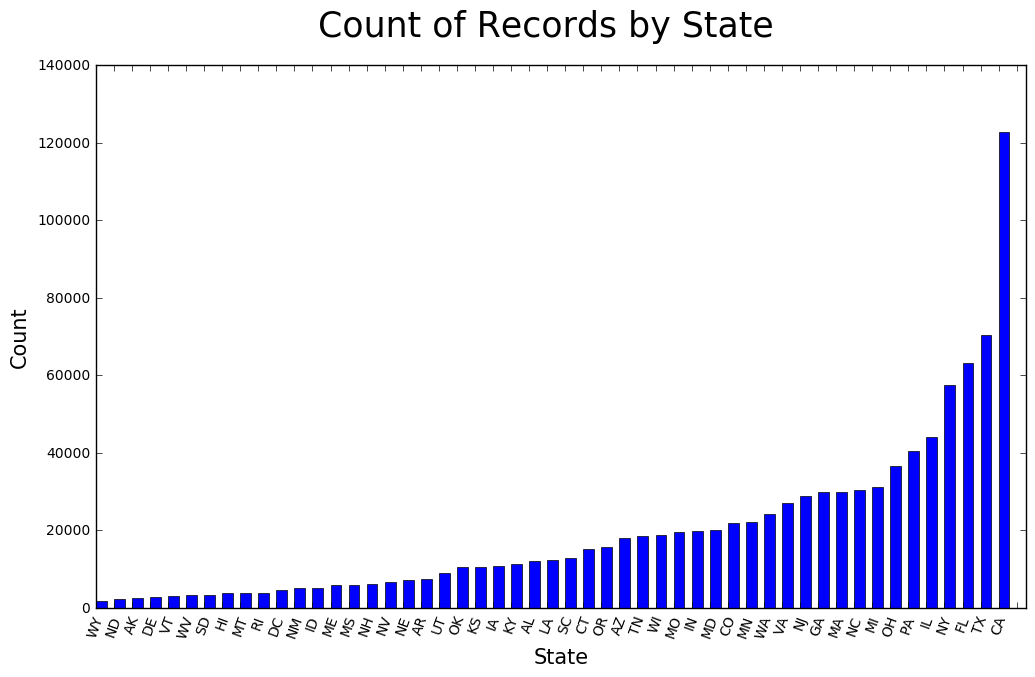

In [74]:
plt.figure(figsize=(12,7)).suptitle('Count of Records by State',fontsize=25)
plt.bar(range(len(D)),D,width = 0.6,linewidth=.5)
plt.xticks(range(0,len(D)+1),xs,rotation=70)
plt.xlim(xmax=len(D)+0.5)
plt.xlabel('State',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show();

In [75]:
import plotly.plotly as py
import plotly.graph_objs as go

x=xs
y=D

data = [go.Bar(
            x=x,y=y,
            marker=dict(
                color='rgb(237, 161, 61)',
                line=dict(
                    color='rgb(206, 123, 14)',
                    width=1.5),
            ),
            opacity=0.8
        )]

layout = go.Layout(title='Count of Records by State',
        xaxis=dict(
        title='State',
        titlefont=dict(size=18,color='rgb(107,107,107)'),
        tickfont=dict(
            size=12,
            color='rgb(107, 107, 107)')
    ),
    yaxis=dict(
        title='Count',
        titlefont=dict(
            size=18,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=12,
            color='rgb(107, 107, 107)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### Distribution of Records by Headcount

In [76]:
H = df.headcount.value_counts().to_dict()

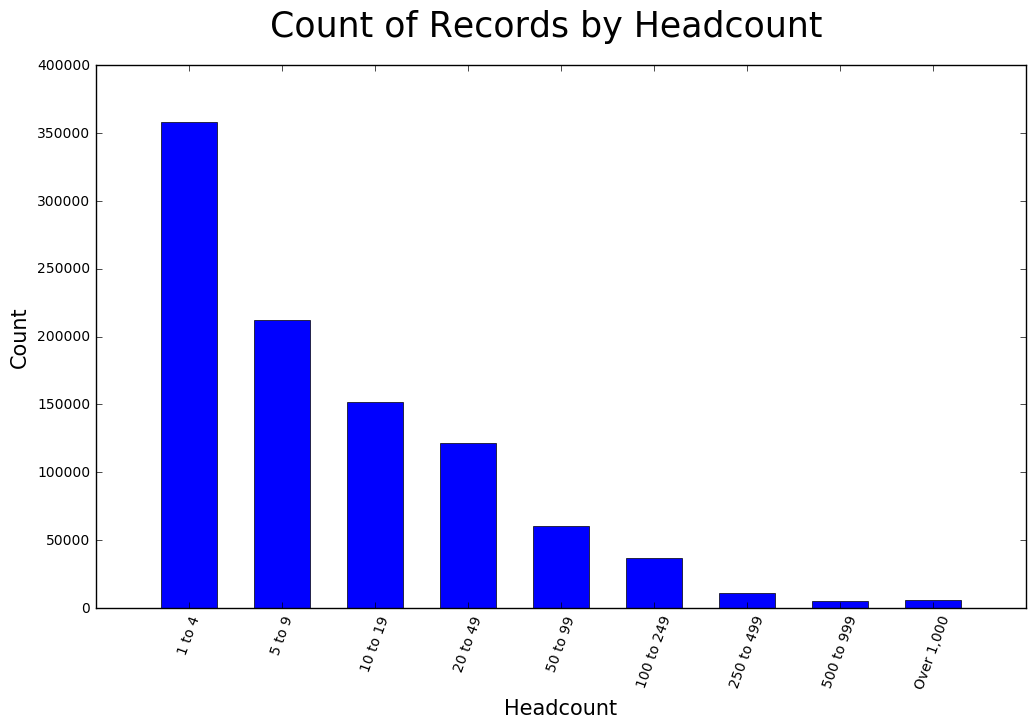

In [77]:
headcount = ['1 to 4','5 to 9','10 to 19','20 to 49','50 to 99','100 to 249','250 to 499',
            '500 to 999','Over 1,000']
y = [H[h] for h in headcount]

plt.figure(figsize=(12,7)).suptitle('Count of Records by Headcount',fontsize=25)
plt.bar(range(len(H)-1), y ,width = 0.6,linewidth=.5,align='center')
plt.xticks(range(len(H)-1),headcount,rotation=70)

plt.xlabel('Headcount',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show();

In [78]:
import plotly.plotly as py
import plotly.graph_objs as go

x=headcount
y=y

data = [go.Bar(
            x=x,y=y,
            marker=dict(
                color='rgb(85, 67, 140)',
                line=dict(
                    color='rgb(31, 24, 53)',
                    width=1.5),
            ),
            opacity=0.8
        )]

layout = go.Layout(title='Count of Records by Headcount',
        xaxis=dict(
        title='Headcount',
        titlefont=dict(size=18,color='rgb(107,107,107)'),
        tickfont=dict(
            size=12,
            color='rgb(107, 107, 107)')
    ),
    yaxis=dict(
        title='Count',
        titlefont=dict(
            size=18,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=12,
            color='rgb(107, 107, 107)'
        )
    ),
    annotations=[
        dict(x=xi,y=yi,
             text=str(yi),
             xanchor='center',
             yanchor='bottom',
             showarrow=False,
             font=dict(family='Arial',size=10)
        ) for xi, yi in zip(x, y)]
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### Distribution by Revenue

In [79]:
R = df.revenue.value_counts().to_dict()

In [80]:
x_labels = ['< $500,000', '$500,000 to $1M','$1M to $2.5M',
            '$2.5M to $5M','$5M to $10M','$10M to $20M','$20M to $50M',
            '$50M to $100M','$100M to $500M','> $500M','> $1B']

In [81]:
y = [R[x] for x in x_labels]

KeyError: '< $500,000'

In [83]:
import plotly.plotly as py
import plotly.graph_objs as go

x = x_labels
y=y

data = [go.Bar(
            x=x,y=y,
            marker=dict(
                color='rgb(1, 142, 20)',
                line=dict(
                    color='rgb(1, 114, 16)',
                    width=1.5),
            ),
            opacity=0.8
        )]

layout = go.Layout(title='Count of Records by Revenue',
     margin=go.Margin(
        l=50,
        r=50,
        t=50,
        b=100,
    pad=4),
    xaxis=dict(
        title='Revenue',
        titlefont=dict(size=18,color='rgb(107,107,107)'),
        tickfont=dict(
            size=10,
            color='rgb(107, 107, 107)'),
        tickangle=45,
        showticklabels=True),
    yaxis=dict(
        title='Count',
        titlefont=dict(
            size=18,
            color='rgb(107, 107, 107)'),
        tickfont=dict(
            size=10,
            color='rgb(107, 107, 107)'))
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

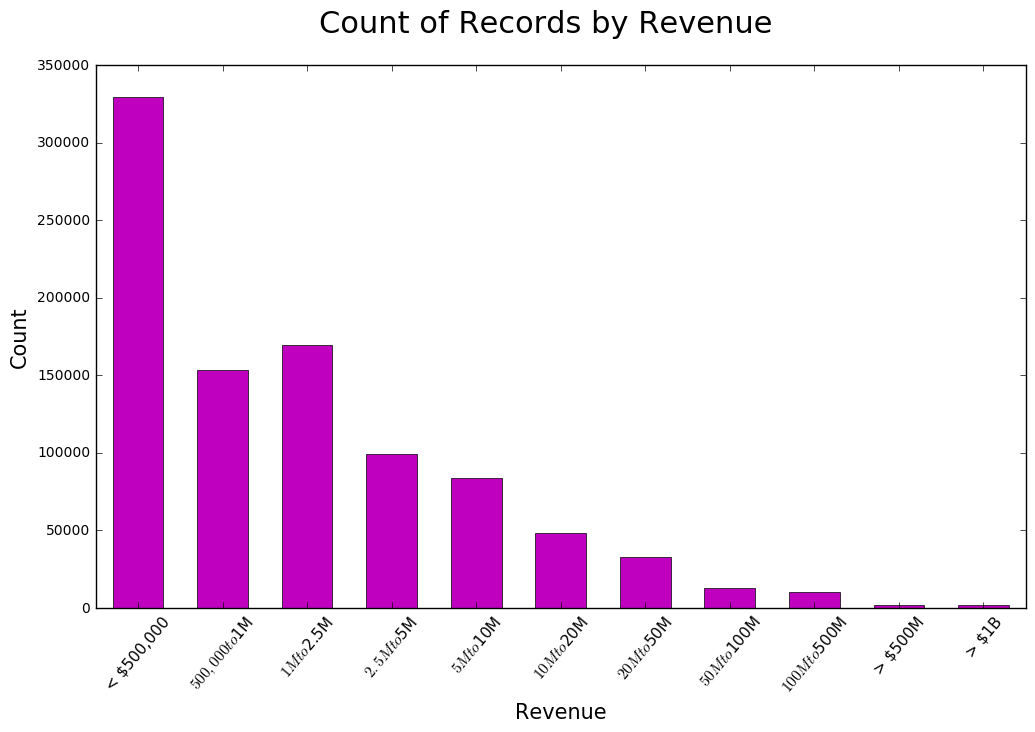

In [82]:
revenue = ['Less Than $500,000', '$500,000 to $1 Million','$1 to 2.5 Million',
            '$2.5 to 5 Million','$5 to 10 Million','$10 to 20 Million','$20 to 50 Million',
            '$50 to 100 Million','$100 to 500 Million','Over $500 Million','Over $1 Billion']

y = [R[r] for r in revenue]
x_labels = ['< $500,000', '$500,000 to $1M','$1M to $2.5M',
            '$2.5M to $5M','$5M to $10M','$10M to $20M','$20M to $50M',
            '$50M to $100M','$100M to $500M','> $500M','> $1B']


plt.figure(figsize=(12,7)).suptitle('Count of Records by Revenue',fontsize=22)
plt.bar(range(len(R)-1), y ,width = 0.6,linewidth=.5,align='center',color='m')
plt.xticks(range(len(R)),x_labels,rotation=50,fontsize=11)
plt.xlim(xmin=-0.5,xmax=len(R)-1.5)

plt.xlabel('Revenue',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show();